In [1]:
# Необходмые команды импорта.
import sys
sys.path.append('../../physlearn/')
sys.path.append('../../source')
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
from matplotlib import pylab as plt
import numpy.random as rand
from physlearn.NeuralNet.NeuralNet import NeuralNet
from physlearn.Optimizer.NelderMead.NelderMead import NelderMead
import d1_osc
import ann_constructor
import math_util
from lagaris2d import LagarisSolver2d

from lagaris_mc import LagarisSolver_mc

from visualiser import Visualiser
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline

def grid_vect(a,b,N):
    x = np.linspace(a, b, N, endpoint=True)
    h = x[1] - x[0]
    return np.mgrid[a:b+h:h, a:b+h:h].reshape(2,-1).T

def get_meshgrid(a,b,N):
    x = np.linspace(a, b, N, endpoint=True)
    return np.meshgrid(x,x)

n_sig = 30
a = -5
b = 5
mc_n = 20000
#m_train = 35
#m_trapz = 25
#train_x = np.linspace(a, b, m_train, endpoint = True).reshape(1, m_train) 
#trapz_x = np.linspace(a, b, m_trapz, endpoint = True)
#obs_x = np.linspace(a, b, 200, endpoint = True).reshape(1, 200)

N = 75
xy = grid_vect(a,b,N)
xg,yg = get_meshgrid(a,b,N)

train_xy = np.transpose(xy)
trapz_xy = train_xy

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
lagar = LagarisSolver_mc(2)
lagar.define_psi(n_sig)
net_x = lagar.get_net_x()
dim = lagar.get_dim()
sess = lagar.get_sess()

V = tf.square(net_x)
lagar.define_H_psi(V)

In [3]:
J_mc = lagar.get_cost_func(a,b, train_xy, mc_n)

opt_nm = NelderMead(-2.5,2.5)
opt_nm.set_epsilon_and_sd(0.3, 100)
def opt(J, dim, n_it, eps):
    optimisation_result = opt_nm.optimize(J, dim+1, n_it, eps)
    return optimisation_result

In [4]:
optimisation_result = opt(J_mc, dim, int(1e5), 1e-4)
print("J after optimisation: ", J_mc(optimisation_result.x))
print("Информация: ", optimisation_result)

.... 100000 (100%) 3.043 it\s

J after optimisation:  45.38716056610202
Информация:  Is converge: False
Amount of iterations: 100000
Total time: 32863.91 s
Reached function value: 43.68394932786958
Reason of break: Maximum iterations reached



In [26]:
%matplotlib notebook

(1, 5776)


<IPython.core.display.Javascript object>


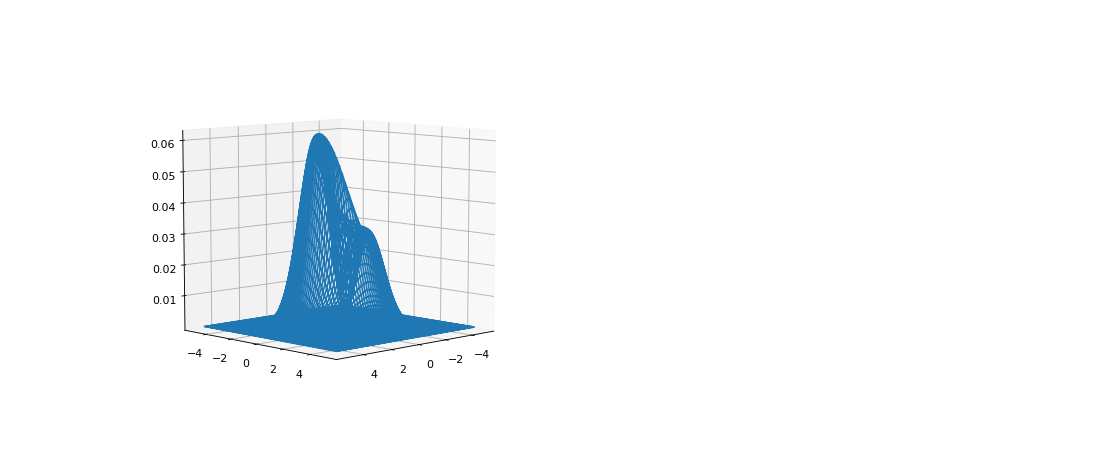

In [27]:
Z = lagar.calc_psi(train_xy, optimisation_result.x[-1])
Z2 = d1_osc.wf_nd([0,0], xy)
Z2 = Z2.reshape(1,Z2.size)
#print(Z)
print(Z.shape)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(xy[:,0], xy[:,1], Z-Z2)

<IPython.core.display.Javascript object>


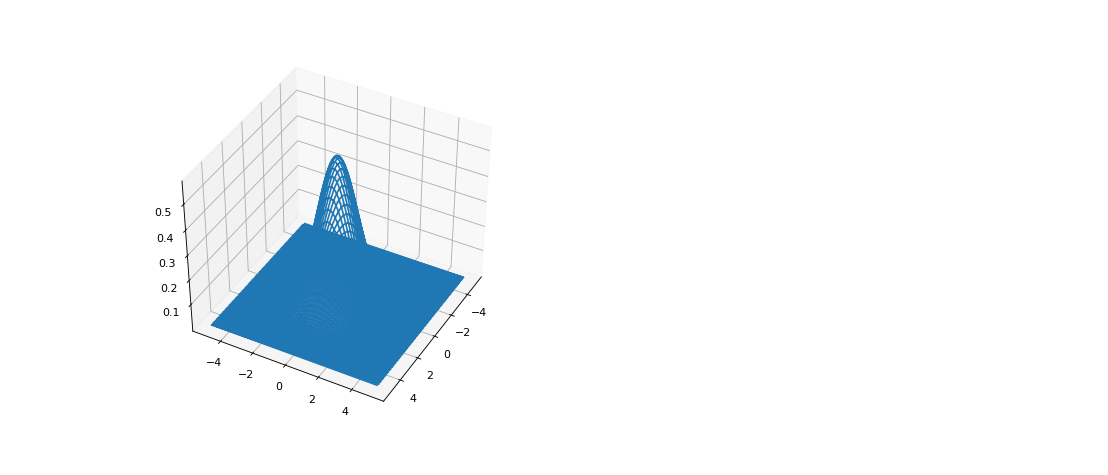

In [28]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(xy[:,0], xy[:,1], Z)

In [7]:
math_util.std_err(Z-Z2)

0.01609704129629693

<IPython.core.display.Javascript object>


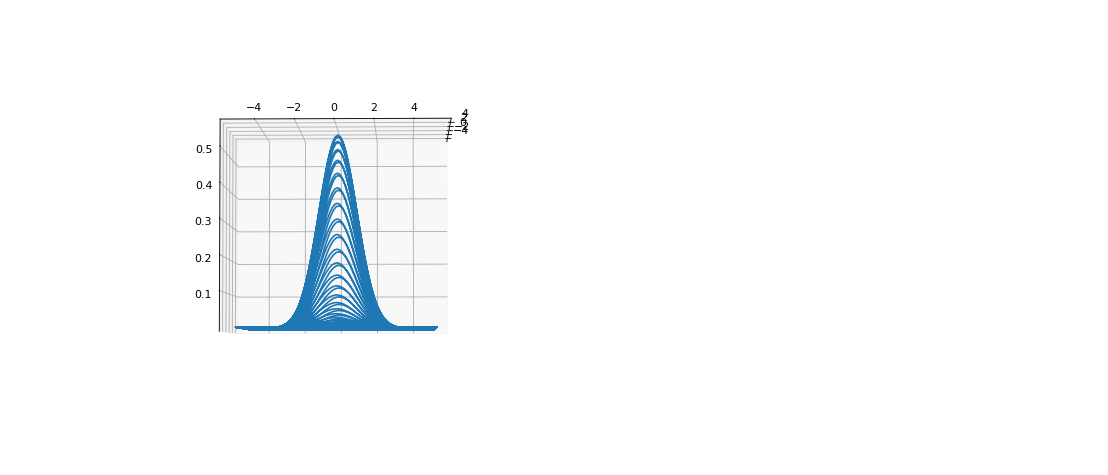

In [29]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(xy[:,0], xy[:,1], Z2)